In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [195]:
data= pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
male_survival = data[data['Sex'] == 'male']['Survived']
female_survival = data[data['Sex'] == 'female']['Survived']

z_stat, p_value_z = stats.ttest_ind(male_survival.dropna(), female_survival.dropna(), equal_var=False)
p_value_z = p_value_z if not np.isnan(p_value_z) else 0.0

print(f"Z-Test: Z-Statistic = {z_stat:.4f}, P-Value = {p_value_z:.4f}")


Z-Test: Z-Statistic = -18.6718, P-Value = 0.0000


In [199]:
survivors_fare = data[data['Survived'] == 1]['Fare']
non_survivors_fare = data[data['Survived'] == 0]['Fare']

t_stat, p_value_t = stats.ttest_ind(survivors_fare.dropna(), non_survivors_fare.dropna(), equal_var=False)
p_value_t = p_value_t if not np.isnan(p_value_t) else 0.0

print(f"T-Test: T-Statistic = {t_stat:.4f}, P-Value = {p_value_t:.4f}")


T-Test: T-Statistic = 6.8391, P-Value = 0.0000


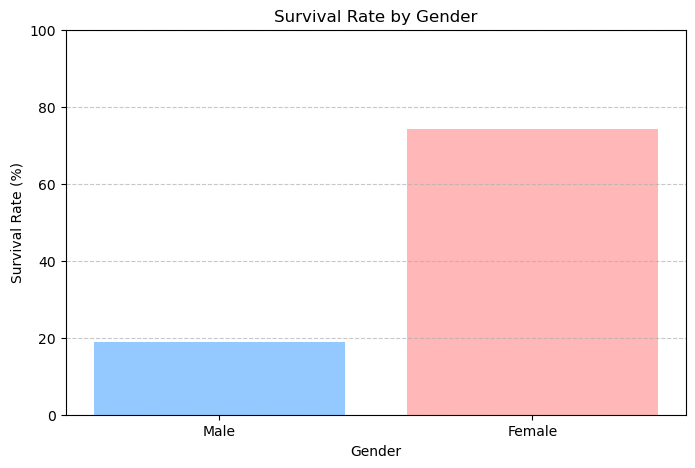

In [201]:
plt.figure(figsize=(8, 5))
gender_survival_rates = [male_survival.mean() * 100, female_survival.mean() * 100]
plt.bar(["Male", "Female"], gender_survival_rates, color=["#66b3ff", "#ff9999"], alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Gender")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1213433283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Survived'].astype(str), y=data['Fare'], palette={"0": "#ff6666", "1": "#66cc66"})


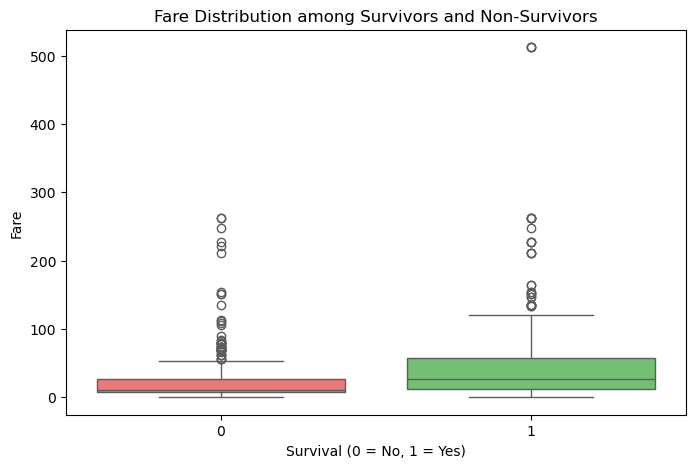

In [203]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Survived'].astype(str), y=data['Fare'], palette={"0": "#ff6666", "1": "#66cc66"})
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.title("Fare Distribution among Survivors and Non-Survivors")
plt.show()

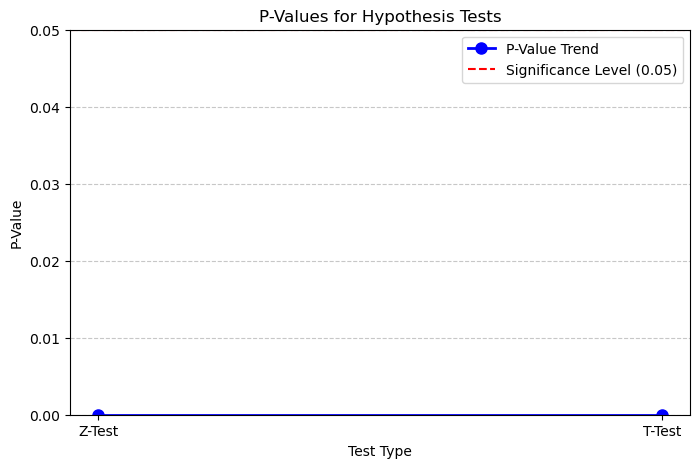

In [213]:
plt.figure(figsize=(8, 5))
plt.plot(tests, p_values, marker='o', linestyle='-', color='b', markersize=8, linewidth=2, label="P-Value Trend")
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.xlabel("Test Type")
plt.ylabel("P-Value")
plt.title("P-Values for Hypothesis Tests")
plt.ylim(0, max(p_values) + 0.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
